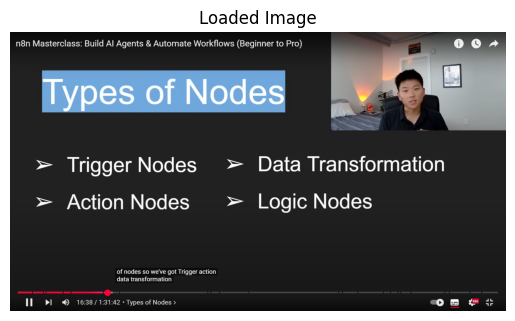

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\jaikr\OneDrive\Pictures\Screenshots\Screenshot (3).png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display in matplotlib

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title('Loaded Image')
plt.show()


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [5]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(172)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df["Class"].value_counts()

Class
Business    49423
Eco         46532
Eco Plus     7467
Name: count, dtype: int64

In [10]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Customer Type"] = df["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
df["Type of Travel"] = df["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
df["Class"] = df["Class"].map({"Business":1,"Eco":2,"Eco Plus":3})
df["satisfaction"] = df["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})


In [11]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0


In [12]:
##handle imbalance in data

loyal_customer = df[df["Customer Type"] == 1].loc[0:20000]
disloyal_customer = df[df["Customer Type"] == 0]



In [13]:
balance_df = pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0
5,0,1,0,2,0,26,1180,1,4,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103892,0,0,1,1,0,37,596,3,3,3,110,121.0
103895,0,0,1,2,0,24,1055,1,5,1,13,10.0
103899,0,0,1,2,0,23,192,2,4,2,3,0.0
103901,1,0,1,1,0,30,1995,4,4,4,7,14.0


In [14]:
balance_df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [15]:
balance_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0
5,0,1,0,2,0,26,1180,1,4,1,0,0.0


In [16]:
x = balance_df.drop('Customer Type',axis=1)
y = balance_df[['Customer Type']]

In [17]:
x.shape,y.shape

((35239, 11), (35239, 1))

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [19]:
from  sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled.shape

(28191, 11)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

##defining ANN model 
model = Sequential()

##input layer 
model.add(Dense(68,activation='relu',input_dim=X_train_scaled.shape[1]))
##hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))

##output layer
model.add(Dense(1,activation='sigmoid'))

##compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# Input layer
model.add(Dense(68, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))  # Drops 30% of neurons randomly

# Hidden layers with Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))  # Drops 20% of neurons

model.add(Dense(12, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Input layer with L2 regularization
model.add(Dense(68, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))

# Hidden layers with L1 and L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))  # L1 regularization
model.add(Dense(24, activation='relu', kernel_regularizer=l2(0.01)))   # L2 regularization
model.add(Dense(12, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.01)))  # Both L1 & L2

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Stop when validation loss stops improving
    patience=3,            # Wait 3 epochs before stopping
    restore_best_weights=True # Restore the best model weights
)

# Train model with EarlyStopping
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,                 # Set a high number of epochs
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping]  # Use EarlyStopping
)


Epoch 1/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9433 - loss: 0.1451 - val_accuracy: 0.9235 - val_loss: 0.2115
Epoch 2/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9438 - loss: 0.1475 - val_accuracy: 0.9269 - val_loss: 0.2089
Epoch 3/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9449 - loss: 0.1408 - val_accuracy: 0.9235 - val_loss: 0.2165
Epoch 4/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9414 - loss: 0.1491 - val_accuracy: 0.9238 - val_loss: 0.2110
Epoch 5/50
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9427 - loss: 0.1435 - val_accuracy: 0.9240 - val_loss: 0.2138


In [31]:
history = model.fit(X_train_scaled,y_train,epochs=30,batch_size=32,validation_data=(X_test_scaled,y_test))

Epoch 1/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9373 - loss: 0.1641 - val_accuracy: 0.9288 - val_loss: 0.1978
Epoch 2/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9382 - loss: 0.1651 - val_accuracy: 0.9249 - val_loss: 0.1995
Epoch 3/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9350 - loss: 0.1659 - val_accuracy: 0.9255 - val_loss: 0.1997
Epoch 4/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9379 - loss: 0.1667 - val_accuracy: 0.9235 - val_loss: 0.2030
Epoch 5/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9377 - loss: 0.1641 - val_accuracy: 0.9248 - val_loss: 0.2004
Epoch 6/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9397 - loss: 0.1614 - val_accuracy: 0.9211 - val_loss: 0.2025
Epoch 7/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9374 - loss: 0.1640 - val_accuracy: 0.9252 - val_loss: 0.2012
Epoch 8/30
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9374 - loss: 0.1627 - val_accuracy: 0.

In [24]:
training_details = pd.DataFrame(history.history)
training_details

,accuracy,loss,val_accuracy,val_loss
0,0.890852,0.278144,0.908343,0.238244
1,0.909546,0.235160,0.911464,0.234360
2,0.913412,0.224303,0.914302,0.222523
3,0.916498,0.216860,0.915295,0.214718
4,0.918378,0.209961,0.920403,0.214310
5,0.921358,0.204672,0.922106,0.208893
6,0.921925,0.202023,0.915437,0.211687
7,0.922954,0.198300,0.923808,0.200379
8,0.923983,0.195595,0.923099,0.203905
9,0.924692,0.193556,0.921112,0.201004


<Axes: >

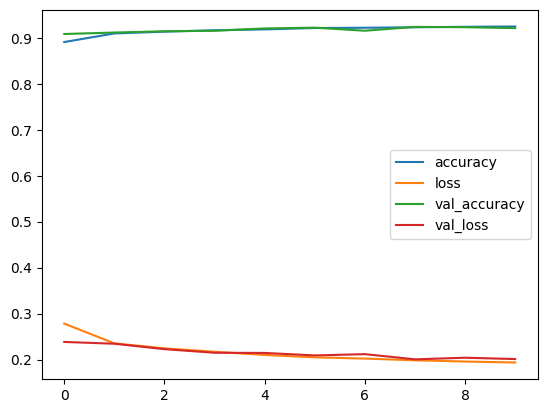

In [25]:
training_details.plot()

<Axes: >

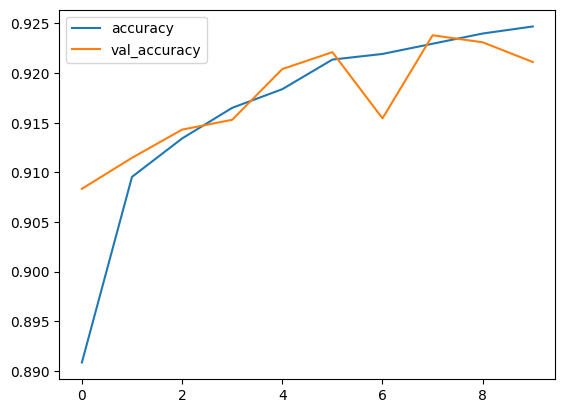

In [29]:
training_details[['accuracy','val_accuracy']].plot()

In [32]:
model.save("customer_satisfaction.h5")